In [14]:
import pandas as pd
import numpy as np
from transformers import RobertaTokenizer

In [15]:
tokenizer = RobertaTokenizer.from_pretrained("microsoft/codebert-base")

## Explore Python Dataset

In [16]:
df = pd.read_csv("python_raw.csv")
code_tokens = tokenizer([line.strip() for line in df['Code']])
df['lens'] = [len(inputs) for inputs in code_tokens.input_ids]

nl_tokens = tokenizer([line.strip() for line in df['NL']])
df['nl_lens'] = [len(inputs) for inputs in nl_tokens.input_ids]

Token indices sequence length is longer than the specified maximum sequence length for this model (2114 > 512). Running this sequence through the model will result in indexing errors


### Code

In [17]:
# Mean
print("Mean={}, Median={}, Mode={}".format(int(df['lens'].mean()), df['lens'].median(), df['lens'].mode()[0]))

Mean=192, Median=106.0, Mode=19


In [18]:
df[(df['lens'] < 200) & (df['nl_lens'] < 30)].shape[0]

61310

### NL

In [19]:
# Mean
print("Mean={}, Median={}, Mode={}".format(int(df['nl_lens'].mean()), df['nl_lens'].median(), df['nl_lens'].mode()[0]))

Mean=13, Median=13.0, Mode=11


In [20]:
df[(df['lens'] < 200) & (df['nl_lens'] < 30)].shape[0]

61310

### Create a smaller dataset

In [21]:
small_py = df[(df['lens'] < 200) & (df['nl_lens'] < 30)]
print(small_py.shape[0])
small_py = small_py.sample(40000)
print(small_py.shape[0])
small_py[['NL', 'Code']].to_csv('python_staqc.csv')

61310
40000


In [22]:
# Mean
print("Mean={}, Median={}, Mode={}".format(int(small_py['lens'].mean()), small_py['lens'].median(), small_py['lens'].mode()[0]))

Mean=80, Median=71.0, Mode=19


<AxesSubplot:title={'center':'Frequency of Python Code Lengths'}, ylabel='Frequency'>

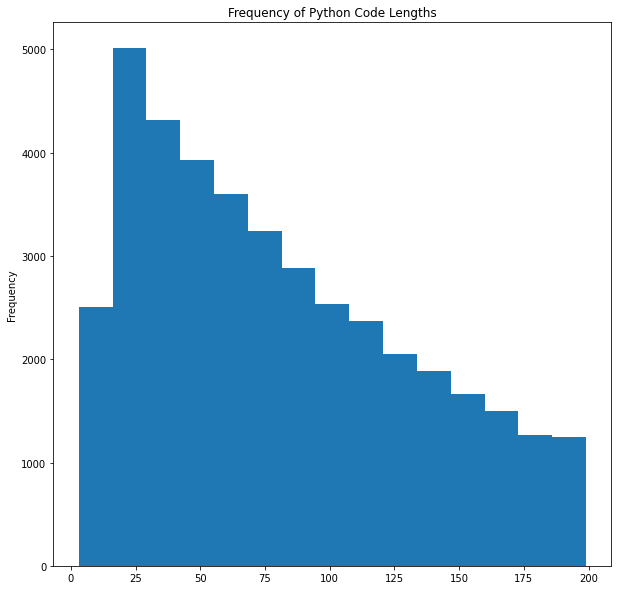

In [29]:
small_py['lens'].plot.hist( figsize=(10, 10), bins=15, title="Frequency of Python Code Lengths")

In [31]:
# Mean
print("Mean={}, Median={}, Mode={}".format(int(small_py['nl_lens'].mean()), small_py['nl_lens'].median(), small_py['nl_lens'].mode()[0]))

Mean=13, Median=13.0, Mode=12


<AxesSubplot:title={'center':'Frequency of Python Question(NL) Lengths'}, ylabel='Frequency'>

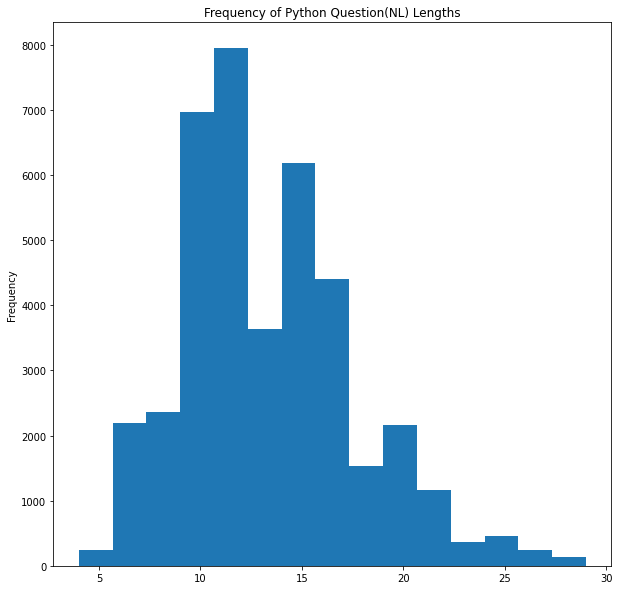

In [33]:
small_py['nl_lens'].plot.hist( figsize=(10, 10), bins=15, title="Frequency of Python Question(NL) Lengths")

## Explore the SQL Dataset

In [34]:
df = pd.read_csv("sql_raw.csv")
code_tokens = tokenizer([line.strip() for line in df['Code']])
df['lens'] = [len(inputs) for inputs in code_tokens.input_ids]

nl_tokens = tokenizer([line.strip() for line in df['NL']])
df['nl_lens'] = [len(inputs) for inputs in nl_tokens.input_ids]

### Code

In [35]:
# Mean
print("Mean={}, Median={}, Mode={}".format(int(df['lens'].mean()), df['lens'].median(), df['lens'].mode()[0]))

Mean=149, Median=91.0, Mode=24


In [36]:
df[(df['lens'] < 200) & (df['nl_lens'] < 30)].shape[0]

59872

### NL

In [37]:
# Mean
print("Mean={}, Median={}, Mode={}".format(int(df['nl_lens'].mean()), df['nl_lens'].median(), df['nl_lens'].mode()[0]))

Mean=12, Median=12.0, Mode=10


In [38]:
df[df['nl_lens'] < 20].shape[0]

70329

### Create a smaller dataset

In [39]:
small_sql = df[(df['lens'] < 200) & (df['nl_lens'] < 30)]
print(small_sql.shape[0])
small_sql = small_sql.sample(40000)
print(small_sql.shape[0])
small_sql[['NL', 'Code']].to_csv('sql_staqc.csv')

59872
40000


In [40]:
# Mean
print("Mean={}, Median={}, Mode={}".format(int(small_sql['lens'].mean()), small_sql['lens'].median(), small_sql['lens'].mode()[0]))

Mean=80, Median=71.0, Mode=24


<AxesSubplot:title={'center':'Frequency of SQL Code Lengths'}, ylabel='Frequency'>

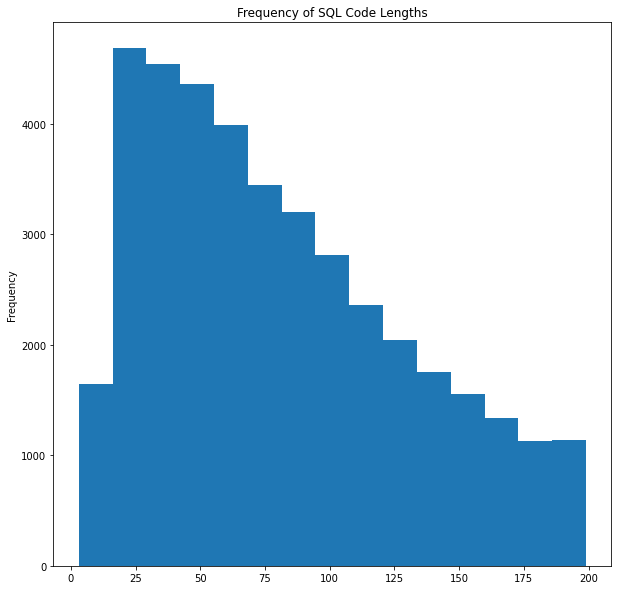

In [41]:
small_sql['lens'].plot.hist( figsize=(10, 10), bins=15, title="Frequency of SQL Code Lengths")

In [113]:
# Mean
print("Mean={}, Median={}, Mode={}".format(int(small_sql['nl_lens'].mean()), small_sql['nl_lens'].median(), small_sql['nl_lens'].mode()[0]))

Mean=12, Median=12.0, Mode=10


<AxesSubplot:title={'center':'Frequency of SQL Question(NL) Lengths'}, ylabel='Frequency'>

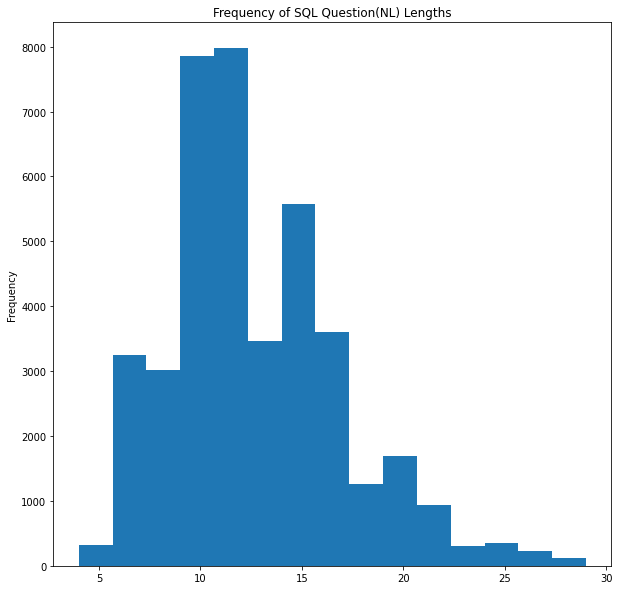

In [42]:
small_sql['nl_lens'].plot.hist( figsize=(10, 10), bins=15, title="Frequency of SQL Question(NL) Lengths")

### Create Train Test Validation Split

#### Python

In [10]:
py_data = pd.read_csv('python_staqc.csv')

# Create Train, Test, Validation Splits
data_size = py_data.shape[0]
train_size = int(.70*data_size)
test_size = int(data_size * .15)
val_size = data_size - train_size - test_size

print("Train Size:{}\nTest Size:{}\nValidation Size:{}".format(train_size, test_size, val_size)) 

Train Size:28000
Test Size:6000
Validation Size:6000


In [11]:
train_data = py_data.sample(train_size)
test_data = py_data.sample(test_size)
val_data = py_data.sample(val_size)

train_data.to_csv("./python/train.csv")
test_data.to_csv("./python/test.csv")
val_data.to_csv("./python/val.csv")

#### SQL

In [12]:
sql_data = pd.read_csv('sql_staqc.csv')

# Create Train, Test, Validation Splits
data_size = sql_data.shape[0]
train_size = int(.70*data_size)
test_size = int(data_size * .15)
val_size = data_size - train_size - test_size

print("Train Size:{}\nTest Size:{}\nValidation Size:{}".format(train_size, test_size, val_size)) 

Train Size:28000
Test Size:6000
Validation Size:6000


In [13]:
train_data = sql_data.sample(train_size)
test_data = sql_data.sample(test_size)
val_data = sql_data.sample(val_size)

train_data.to_csv("./sql/train.csv")
test_data.to_csv("./sql/test.csv")
val_data.to_csv("./sql/val.csv")